In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

In [2]:
f = open('/Users/Raafe/Desktop/DataDriven/Project/Stever.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [3]:
data.columns=['Time','Power','Temperature']
data1=data

In [4]:
data1['Temperature'] = pd.to_numeric(data1['Temperature'], errors='coerce')
data1['Power'] = pd.to_numeric(data1['Power'], errors='coerce')
data1['Time']=pd.to_datetime(data1['Time'],errors='coerce')

In [5]:
data1=data.set_index('Time',drop=False)
data1.dtypes
data2=data1.drop(data1.columns[0],axis=1)
data3=data2.resample('H').mean()
data4=data3.interpolate()
df=data4

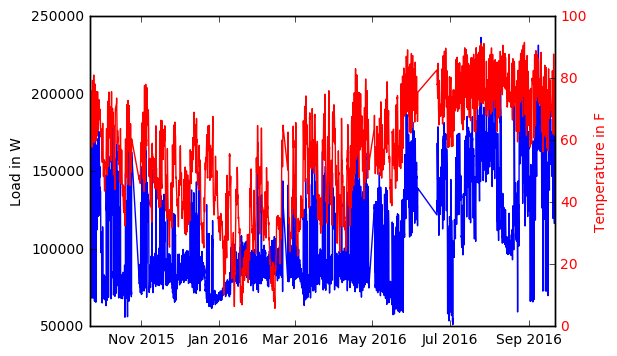

In [6]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.Power)
ax1.set_ylabel('Load in W')

ax2 = ax1.twinx()
ax2.plot(df.Temperature, 'r-')
ax2.set_ylabel('Temperature in F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

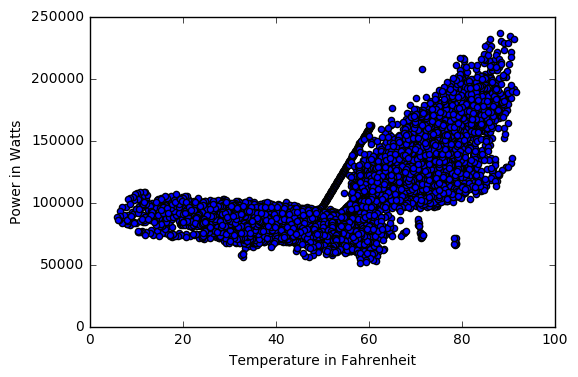

In [7]:
plt.scatter(df.Temperature,df.Power)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Power in Watts')

In [8]:
df['Weekday']=df.index.dayofweek
df['Hour']=df.index.hour

In [9]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(df[['Temperature','Hour','Weekday']], df['Power'])
print(clf.feature_importances_)

[ 0.88614841  0.06813279  0.0457188 ]


In [10]:
clf.score(df[['Temperature','Hour','Weekday']], df['Power'])

1.0

In [11]:
Value=[]

for row in df['Power']:
    if row>98790.240626:
        Value.append(1)
    else:
        Value.append(-1)
        
df['Value']=Value

In [12]:
# plot_step = 1

# X = df[['Temperature','Power']]
# y = df['Value']

# # Let's pre-compute the range for our features
# x_min, x_max = X['Temperature'].min() - 1, X['Temperature'].max() + 1
# y_min, y_max = X['Power'].min() - 1, X['Power'].max() + 1
# # And create a meshgrid so that we can create a countour plot on it
# xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                      np.arange(y_min, y_max, plot_step))

# # Now we predict the values for all of the cells in the meshgrid
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # If you're curious what this is, read here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html and https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# # And we reshape those results to have the same shape as the mesh
# Z = Z.reshape(xx.shape)
# # Now we can finally contour-plot, using a specific colormap
# cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# # Let's add labels to the axes
# plt.xlabel('Temperature')
# plt.ylabel('Power')
# plt.axis("tight")

# # Plot the training points
# plt.plot(df[df.Value>0].Temperature,df[df.Value>0].Power, 'b+')
# plt.plot(df[df.Value<=0].Temperature,df[df.Value<=0].Power, 'ro')
# plt.axis("tight")

# # And add a few more beautification items
# plt.suptitle("Decision surface of our decision tree")
# plt.legend(['Positives','Negatives'])
# plt.show()

$$Mishra Ji's Code$$

In [15]:
d5 = df.set_index('Hour',append=True)
d6 = d5.copy()
d7 = d6.drop(d6.columns[1],axis =1)
d8 = d7.unstack('Hour')
d8['Time'] = d8.index
d8['day'] = d8['Time'].dt.dayofyear
d8 = d8.drop(d8.columns[24], axis = 1)
d9 = d8['Power'].groupby(d8['day']).mean()
d9

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,71214.677399,70328.358986,70833.823829,69860.230991,71888.767840,71254.649480,70010.581186,70142.350652,71578.297918,67630.607814,...,67751.813413,68072.907813,68871.170508,70257.633530,70978.553582,70416.924025,70295.226238,71172.590561,70811.005925,71051.585483
2,71597.109701,71369.165300,71386.316733,70331.883791,70700.402150,71882.197853,71226.337696,72834.453973,72884.980861,68726.851889,...,66742.535223,66967.380795,66947.958986,69863.836069,70230.442775,69955.883277,69377.614606,69853.748243,70378.456837,70336.782814
3,69907.296095,70968.215040,69665.550392,70532.677866,70233.050392,70485.543165,70448.915952,69790.700131,68904.195444,67094.231121,...,70925.393231,69259.836720,72132.218361,73075.061589,72503.731252,71123.424936,71470.354232,70814.761850,71596.750522,72673.724155
4,72291.731252,74557.426694,72340.636981,72592.158335,72337.121225,74473.451564,73448.570314,73184.046225,74636.132284,72153.707748,...,71570.651824,70164.377344,71693.130470,72706.077215,75277.333986,73972.448764,75166.888023,75175.664975,76995.439194,73955.852866
5,77517.882944,75537.326825,76494.012110,76986.974610,76606.411330,76284.357684,76454.691407,76639.663543,73777.661590,73383.217059,...,72463.353581,71333.075327,72383.495119,77618.872137,74446.113674,73738.890105,74929.440496,74080.265887,72767.805600,74598.545183
6,73571.332814,73265.958725,73320.174741,74771.225262,72935.984115,74359.246355,74492.352085,73971.633399,72231.538998,73648.862371,...,71621.095444,72571.148699,70530.022267,76133.240105,78461.604949,76774.598308,76581.801043,78422.948829,75849.613933,75242.499220
7,75595.998829,75640.156772,76367.264715,78014.139844,75265.381642,74796.529298,74986.224350,74791.587501,72123.548793,74973.154689,...,71577.704364,72972.953257,72949.520574,76047.781511,77892.999480,77959.021616,80077.558725,78865.868491,77603.019533,78888.396055
8,79484.797424,76818.609767,74942.274741,73401.015105,73734.755275,73315.793751,73318.049351,75876.028907,74258.508985,74013.390887,...,71356.722853,71054.671747,76511.814844,75492.389845,78921.284637,78511.404689,77702.347527,76108.577866,78550.869403,75850.025262
9,75361.525131,74488.178256,71304.080600,72575.195053,70339.986460,69878.951238,69783.929820,69626.453842,73062.827605,71124.208270,...,81275.646358,72230.730600,74066.317710,78371.017709,80398.559767,84749.977086,83338.622918,83734.917580,83108.740756,80933.590757


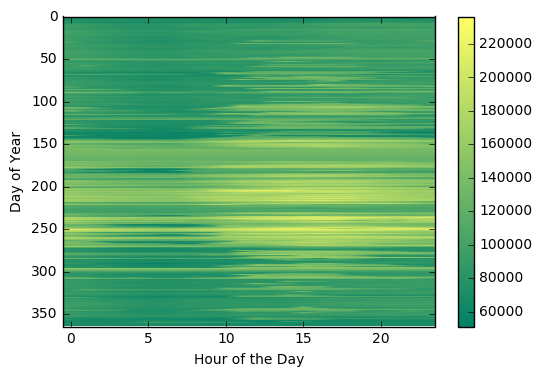

In [16]:
plt.imshow(d9, aspect='auto',cmap='summer')
plt.ylabel('Day of Year')
plt.xlabel('Hour of the Day')
plt.colorbar()

0         Axes(0.1,0.736957;0.363636x0.163043)
1    Axes(0.536364,0.736957;0.363636x0.163043)
2         Axes(0.1,0.541304;0.363636x0.163043)
3    Axes(0.536364,0.541304;0.363636x0.163043)
4         Axes(0.1,0.345652;0.363636x0.163043)
5    Axes(0.536364,0.345652;0.363636x0.163043)
6             Axes(0.1,0.15;0.363636x0.163043)
dtype: object

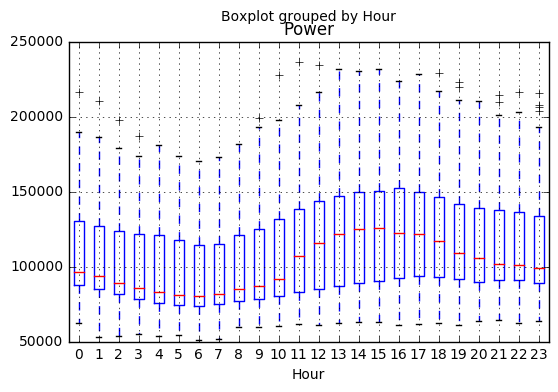

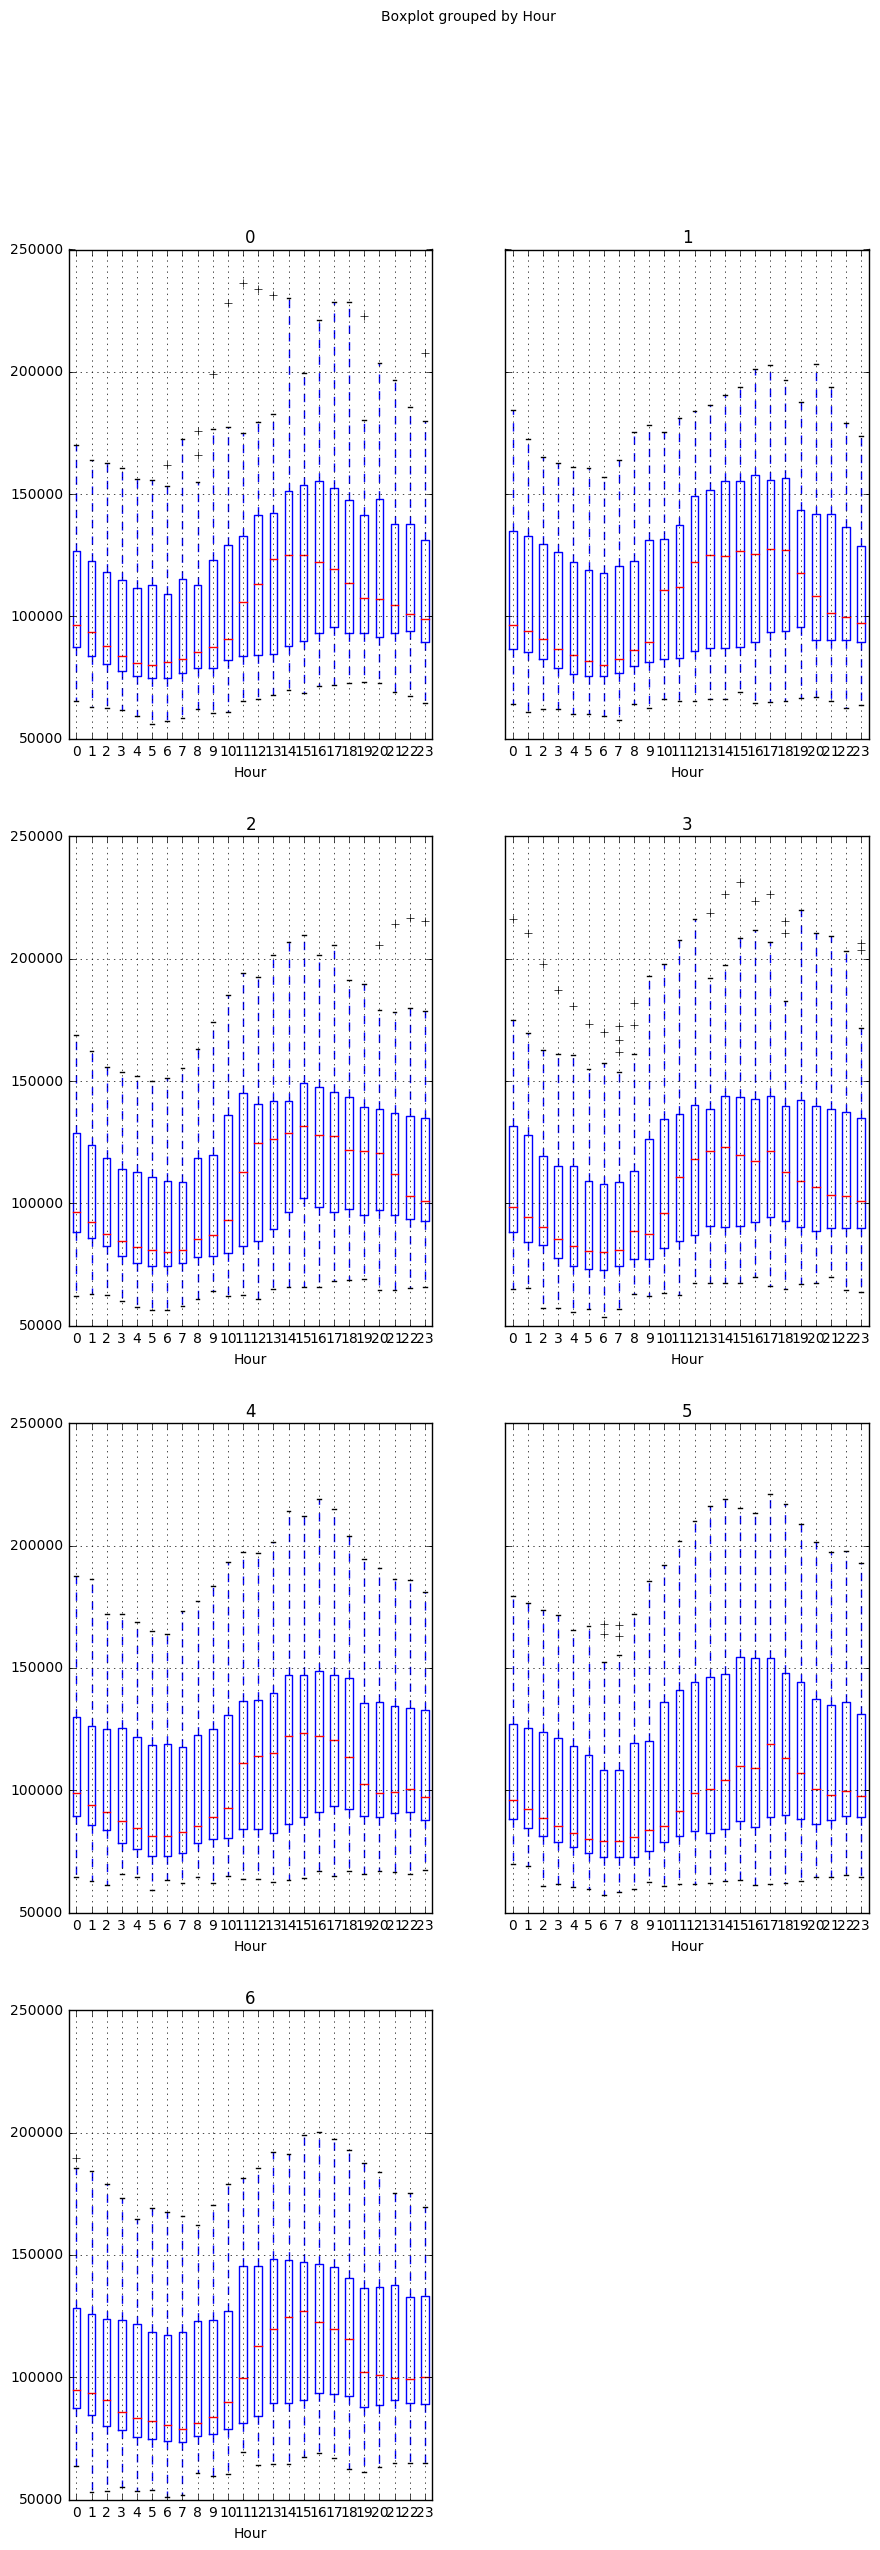

In [19]:
d10 = df.copy()
d10['Time'] = d10.index
d10['Weekday'] = d10['Time'].dt.dayofweek
d10.boxplot(by="Hour",column=['Power'])

d10.groupby('Weekday').boxplot(by="Hour",column=['Power'],figsize=(10,30),layout=(4,2))

$$End of Mishra Ji's Code$$